In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Maze():
    def __init__(self,maze,start,end):
        self.maze = maze
        self.maze_height = maze.shape[0]
        self.maze_width = maze.shape[1] 
        self.start_position = start   
        self.goal_position = end

    def show(self):
        plt.figure(figsize=(10,10))

        plt.imshow(self.maze,cmap="gray")
        plt.text(self.start_position[0], self.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[0], self.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)
        
        plt.xticks([]), plt.yticks([])

        plt.show()

        

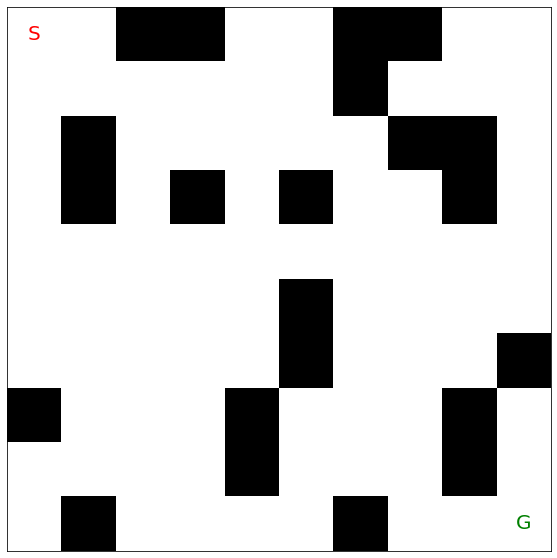

(10, 10)


In [4]:
maze_size = (10, 10)

# Generate random maze with binary values (0 - open, 1 - wall)
maze = np.random.binomial(1, 0.8, size=maze_size)




wall = 0
path = 1
# make sure s and g lies in path(1) and there is some way from s to g so there are some routes form s to g
maze_draw = maze


maze = Maze(maze_draw,(0,0),(maze_draw.shape[1]-1,maze_draw.shape[0]-1))
maze.show()
print(maze_draw.shape)

In [5]:
actions = [(-1, 0), 
          (1, 0),   
          (0, -1), 
          (0, 1)]
 # to make sure to know wheather we are testing or training

class QAgent():
    def __init__(self,maze,lr =0.1,gamma = 0.9,exp_s = 1,exp_e = 0.01,num = 100):
        self.q_table = np.zeros((maze.maze_height,maze.maze_width,4))
        self.gamma = gamma
        self.lr = lr
        self.exp_s = exp_s
        self.exp_e = exp_e
        self.num = num
        self.test = False
        

    def get_exploration_rate(self,current_episode):
  
 
        #exp_rate = self.exp_s * 0.99 ** current_episode
        exp_rate = (self.exp_e/self.exp_s) ** (current_episode/self.num)

        return exp_rate
    def get_action(self,state,current_episode):
        exp_rate = self.get_exploration_rate(current_episode)

        if np.random.rand() < exp_rate and self.test == False:
            return np.random.randint(4) 
        else:
            return np.argmax(self.q_table[state])
        
    def update_q_table(self, state, action, next_state, reward):

        best_next_action = np.argmax(self.q_table[next_state])


        current_q_value = self.q_table[state][action]


        new_q_value = current_q_value + self.lr * (reward + self.gamma * self.q_table[next_state][best_next_action] - current_q_value)


        self.q_table[state][action] = new_q_value  
        

In [6]:
goal_reward = 100
wall_penalty = -10
step_penalty = -1

In [7]:
def begin(agent,maze,current_episode,train = True):

    current_state = maze.start_position
    is_done = False
    ep_reward = 0
    step = 0
    path = [current_state]

    while not is_done:
        action = agent.get_action(current_state,current_episode)

        next_state = (current_state[0] + actions[action][0],current_state[1]+actions[action][1])


        if next_state[0] <0 or next_state[0] >= maze.maze_height or next_state[1] <0 or next_state[1] >= maze.maze_width or maze.maze[next_state[1]][next_state[0]] == wall:
            reward = wall_penalty
            next_state = current_state
         
            
        elif next_state == maze.goal_position:
            path.append(current_state)
            reward = goal_reward
            is_done = True

            
        else:
            path.append(current_state)
            reward = step_penalty
            

        ep_reward = reward + ep_reward
        step = step +1
        if ep_reward <= -1000:
            is_done = True

        if train ==   True and agent.test == False: # Plotting the data after training is completed True
            agent.update_q_table(current_state, action, next_state, reward)

        current_state = next_state
    return ep_reward, step, path
    



In [8]:
agent = QAgent(maze)


In [9]:

def train_agent(agent, maze, num_episodes=100):
    # Lists to store the data for plotting
    episode_rewards = []
    episode_steps = []


    for episode in range(num_episodes):
        episode_reward, episode_step, path = begin(agent, maze, episode, train=True)


        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)
        if episode%100 ==0:
            print(f"cuurent episode --- {episode}")
            print(f"current reward {episode_reward}")


    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Reward per Episode')

    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"The average reward is: {average_reward}")

    plt.subplot(1, 2, 2)
    plt.plot(episode_steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps Taken')
    plt.ylim(0, 100)
    plt.title('Steps per Episode')


    average_steps = sum(episode_steps) / len(episode_steps)
    print(f"The average steps is: {average_steps}")

    plt.tight_layout()
    plt.show()

cuurent episode --- 0
current reward -1003
cuurent episode --- 100
current reward 83
cuurent episode --- 200
current reward 83
cuurent episode --- 300
current reward 83
cuurent episode --- 400
current reward 83
cuurent episode --- 500
current reward 83
cuurent episode --- 600
current reward 83
cuurent episode --- 700
current reward 83
cuurent episode --- 800
current reward 83
cuurent episode --- 900
current reward 83
The average reward is: 77.0
The average steps is: 19.831


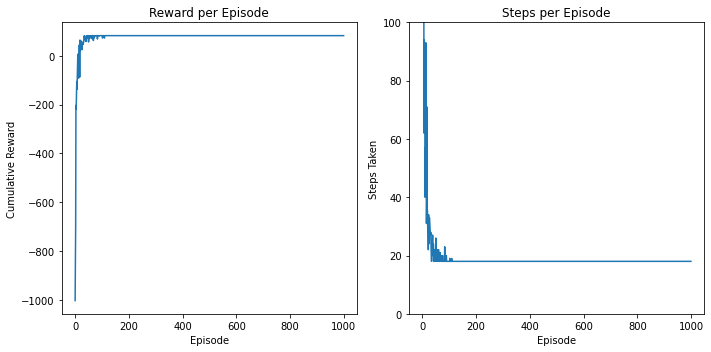

In [11]:
train_agent(agent, maze, num_episodes=1000)

In [12]:
def test_agent(agent, maze, num_episodes=1):
    agent.test = True
    episode_reward, episode_step, path = begin(agent, maze, num_episodes, train=False)

    # Print the learned path of the agent
    print("Learned Path:")
    for row, col in path:
        print(f"({row}, {col})-> ", end='')
    print("Goal!")

    print("Number of steps:", episode_step)
    print("Total reward:", episode_reward)


    if plt.gcf().get_axes():
        plt.cla()


    plt.figure(figsize=(5,5))
    plt.imshow(maze.maze, cmap='gray')

    # Mark the start position (red 'S') and goal position (green 'G') in the maze
    plt.text(maze.start_position[0], maze.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
    plt.text(maze.goal_position[0], maze.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

    # Mark the agent's path with blue '#' symbols
    for position in path:
        plt.text(position[0], position[1], "#", va='center', color='blue', fontsize=20)

    
    plt.xticks([]), plt.yticks([])
    plt.grid(color='black', linewidth=2)
    plt.show()

    return episode_step, episode_reward

Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (1, 1)-> (2, 1)-> (3, 1)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (6, 5)-> (7, 5)-> (7, 6)-> (7, 7)-> (7, 8)-> (7, 9)-> (8, 9)-> Goal!
Number of steps: 18
Total reward: 83


<Figure size 432x288 with 0 Axes>

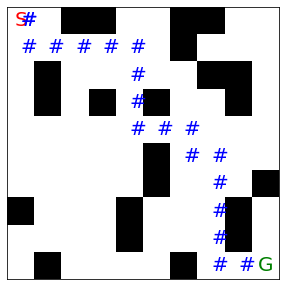

(18, 83)

In [13]:
test_agent(agent, maze, num_episodes=1)